<img src="what_is_churn.jpeg">

### What is customer churn?
Customer churn (or customer attrition) is a tendency of customers to abandon a brand and stop being a paying client of a particular business. The percentage of customers that discontinue using a company’s products or services during a particular time period is called a customer churn (attrition) rate.

### Project Description :

Churn prediction uses big data to detect customers who are likely to cancel their subscriptions and is used by most of the large subscription businesses to identify customers most at-risk of churning. Done well, it leads to huge business savings, regardless of size. Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to predict Churn Rate on the basis of their data usage.

### Data Description:

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.<br>
The data set includes information about:
- Customers who left within the last month – the column is called Churn<br>
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
- Demographic info about customers – gender, age range, and if they have partners and dependents<br>


## Exploratory Data Analysis

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data 
data = pd.read_csv("Churn.csv")
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
# checking size of the dataset
data.shape

(3333, 21)

In [4]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
# checking total missing values per column
data.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [6]:
# Checking descriptive statistical 
data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


## Visualizing data 

### Checking distribution of account lenghts

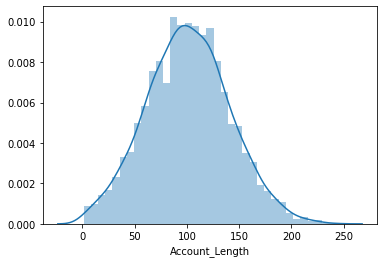

In [7]:
# Distribution plot for account length
sns.distplot(data['Account_Length'])
plt.show()

### Checking differences in account lengths

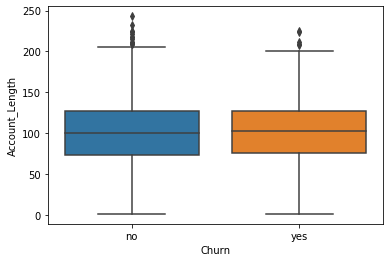

In [8]:
sns.boxplot(x ='Churn',
            y ='Account_Length',
            data = data)
plt.show()

### Adding International plan for checking difference in account lenghts

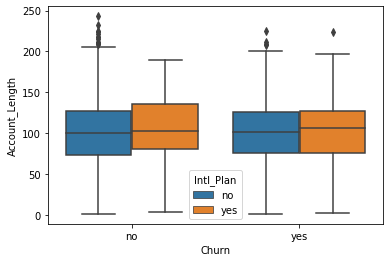

In [9]:
sns.boxplot(x ='Churn',
            y ='Account_Length',
            data = data,
            hue ='Intl_Plan')
plt.show()

### Churners and Non-Churners

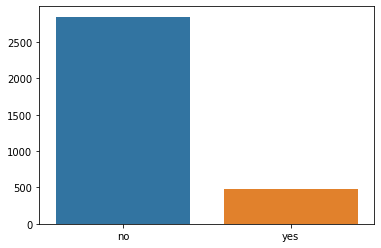

In [10]:
y = data["Churn"].value_counts()
sns.barplot(y.index, y.values)

### Churn by area code

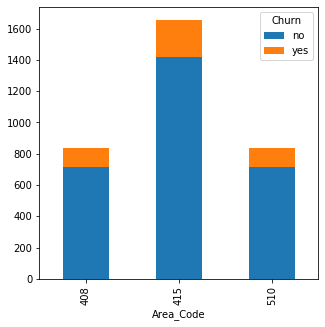

In [11]:
data.groupby(["Area_Code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by State

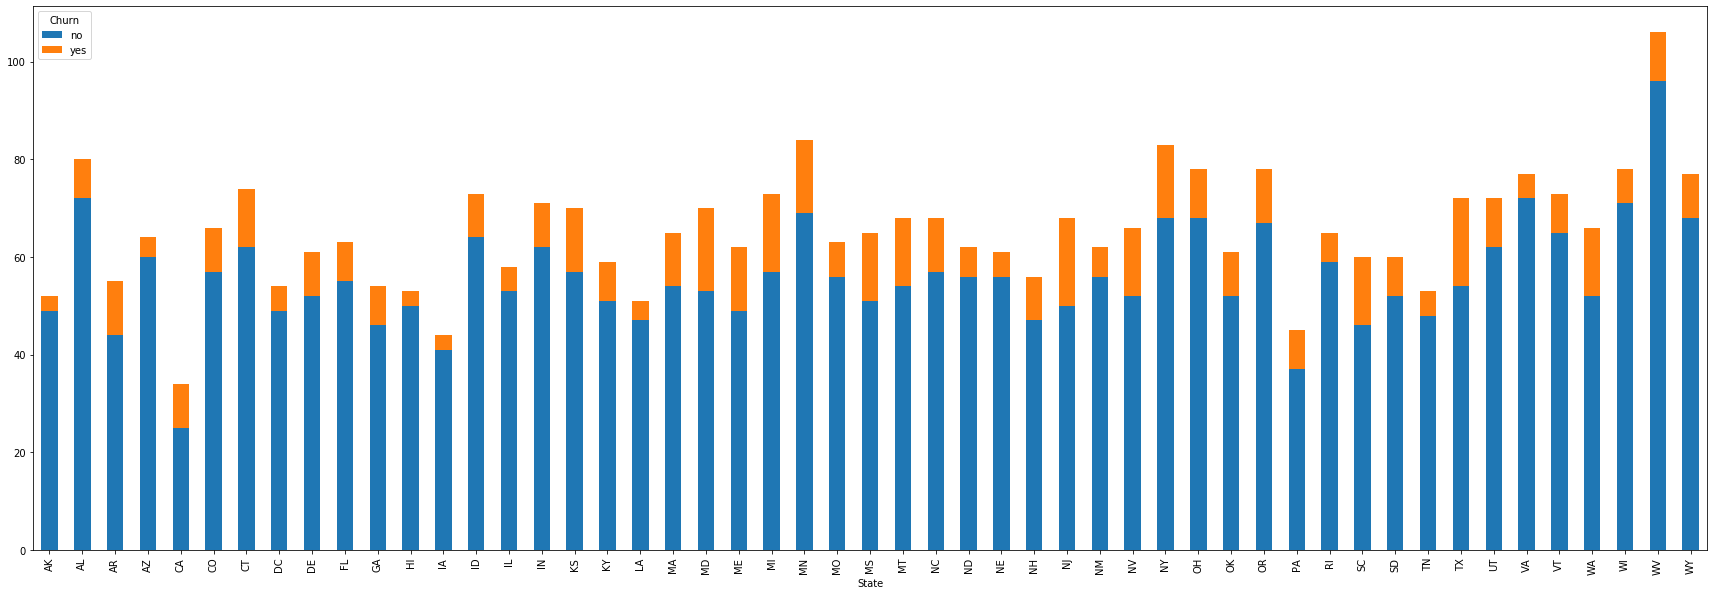

In [12]:
# State Wise Churning of customer
data.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn by International Plan 

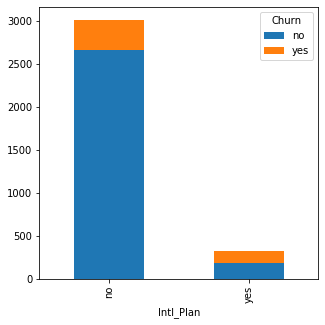

In [13]:
data.groupby(["Intl_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by voice mail plan

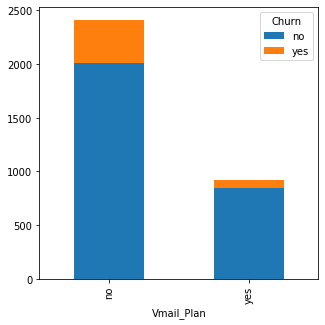

In [14]:
data.groupby(["Vmail_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by CustServ_Calls

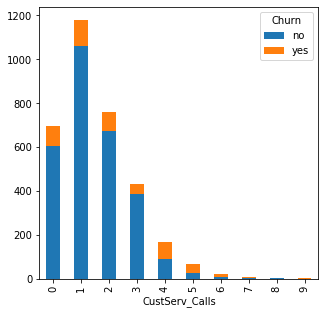

In [15]:
data.groupby(["CustServ_Calls", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

##  Label encoding 

In [16]:
#Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [17]:
# State is string and we want discreet integer values
data['Intl_Plan'] = label_encoder.fit_transform(data['Intl_Plan'])
data['Vmail_Plan'] = label_encoder.fit_transform(data['Vmail_Plan'])
data['Area_Code'] = label_encoder.fit_transform(data['Area_Code'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

#print (data['Voice mail plan'][:4])
print (data.dtypes)

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object


In [18]:
#Dropping State Column
final_data = data.drop(columns=['State'])
final_data = final_data.drop(columns=['Phone'])
final_data.shape

(3333, 19)

In [19]:
final_data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,1.000600
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,0.709649
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,0.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,2.000000


## Correlation matrix 

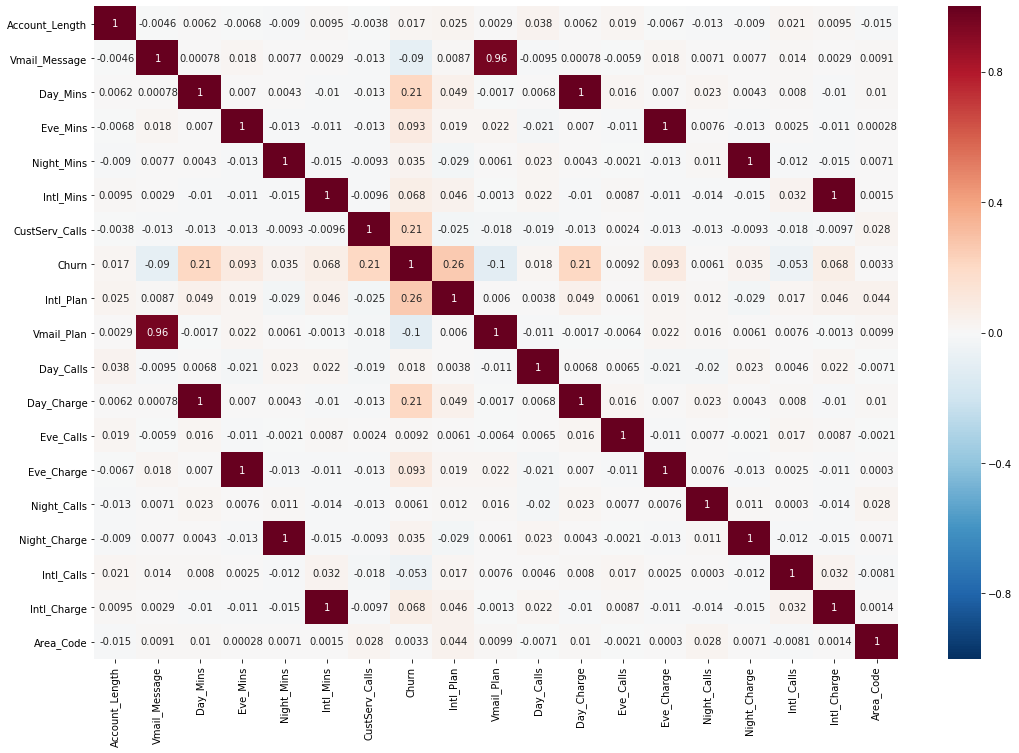

In [20]:
# display(correlation)
plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(final_data.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()


In [21]:
final_data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,1
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,1


## Correlation Threshhold 

In [22]:
def get_features(data,correlation_threshold,target_col):
    """Returns features whose correlation is above a threshold value"""
    correlations = data.corr()[target_col].drop(target_col)
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

target_col = 'Churn'
correlations = final_data.corr()[target_col].drop(target_col)
correlations

Account_Length    0.016541
Vmail_Message    -0.089728
Day_Mins          0.205151
Eve_Mins          0.092796
Night_Mins        0.035493
Intl_Mins         0.068239
CustServ_Calls    0.208750
Intl_Plan         0.259852
Vmail_Plan       -0.102148
Day_Calls         0.018459
Day_Charge        0.205151
Eve_Calls         0.009233
Eve_Charge        0.092786
Night_Calls       0.006141
Night_Charge      0.035496
Intl_Calls       -0.052844
Intl_Charge       0.068259
Area_Code         0.003256
Name: Churn, dtype: float64

## Feature Selection 

In [23]:
feature_sel = get_features(final_data,target_col='Churn',correlation_threshold=0.003)
feature_sel.append('Churn')
final_df = final_data[feature_sel]


## Class Balancing 

In [24]:
def balance_class_downsampling(feat_store,target_col):
    """
    This function downsamples majority class and makes 50%-50% class distribution
    """
    # define major and minor class 
    class_0 = feat_store[feat_store[target_col]==0]
    class_1 = feat_store[feat_store[target_col]==1]
    if (len(class_0)>len(class_1)):
               df_majority = class_0.copy()
               df_minority = class_1.copy()
    else:
               df_majority = class_1.copy()
               df_minority = class_0.copy()
        
    # minor class size
    minor_class_size = len(df_minority)
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=minor_class_size,     # to match minority class
                                 random_state=123) # reproducible results
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    # Separate feature data from label data
    X = df_downsampled.drop(columns=[target_col])
    y = df_downsampled[target_col]
    return X,y

In [25]:
X,y = balance_class_downsampling(final_df,target_col='Churn')

In [26]:
final_df['Churn'].value_counts(normalize=True)*100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

## Data Splitting  

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## RandomForestClassifier 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
time_instance_1 = datetime.datetime.now()
rf = RandomForestClassifier(random_state=121,n_estimators=10)
# Hyper paramter tuning
model_params = {'max_depth':[2,5,10,20]
                }
rf = GridSearchCV(rf, model_params, cv=5)
rf = rf.fit(X_train, y_train)  
y_pred_rf = rf.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf, labels=[0,1]))
print('AUC Score:',metrics.roc_auc_score(y_test, y_pred_rf))

Total time taken to train the model: 0:00:00.658951
Train Accuracy: 0.9866863905325444
Test Accuracy: 0.8206896551724138
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       144
           1       0.84      0.79      0.82       146

    accuracy                           0.82       290
   macro avg       0.82      0.82      0.82       290
weighted avg       0.82      0.82      0.82       290

AUC Score: 0.8208713850837138


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
time_instance_1 = datetime.datetime.now()
rf = RandomForestClassifier(random_state=121,n_estimators=10)
# Hyper paramter tuning
model_params = {'max_depth':[2,5,10,20]
                }
rf = GridSearchCV(rf, model_params, cv=5)
rf = rf.fit(X_train, y_train)  
y_pred_rf = rf.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf, labels=[0,1]))
print('AUC Score:',metrics.roc_auc_score(y_test, y_pred_rf))

Total time taken to train the model: 0:00:00.797689
Train Accuracy: 0.9866863905325444
Test Accuracy: 0.8206896551724138
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       144
           1       0.84      0.79      0.82       146

    accuracy                           0.82       290
   macro avg       0.82      0.82      0.82       290
weighted avg       0.82      0.82      0.82       290

AUC Score: 0.8208713850837138


## Confusion Matrix 

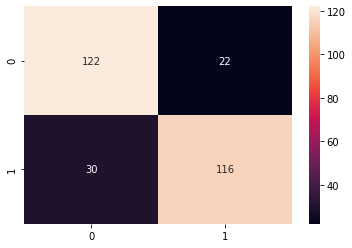

In [30]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True,  fmt='');
plt.show()


In [31]:
conf_matrix

array([[122,  22],
       [ 30, 116]])

## LogisticRegression 

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=121)

param_grid = {'C': [0.001, 0.01, 0.1, 0.123,0.250,1, 10, 100, 1000]}

time_instance_1 = datetime.datetime.now()
logreg = GridSearchCV(logreg, param_grid, cv=5)
logreg = logreg.fit(X_train, y_train)  
y_pred_logreg = logreg.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print(metrics.classification_report(y_test, y_pred_logreg, labels=[0,1]))
print(metrics.roc_auc_score(y_test, y_pred_logreg))

Total time taken to train the model: 0:00:00.660773
Train Accuracy: 0.7662721893491125
Test Accuracy: 0.7413793103448276
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       144
           1       0.77      0.69      0.73       146

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290
weighted avg       0.74      0.74      0.74       290

0.7417237442922373


## AdaBoostClassifier 

In [33]:
time_instance_1 = datetime.datetime.now()
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=121)
# Hyper paramter tuning
#model_params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
#ab = GridSearchCV(ab, model_params, cv=5)

ab = ab.fit(X_train, y_train)  
y_pred_ab = ab.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, ab.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_ab))

print(metrics.classification_report(y_test, y_pred_ab, labels=[0,1]))
print(metrics.roc_auc_score(y_test, y_pred_ab))

Total time taken to train the model: 0:00:00.164881
Train Accuracy: 0.8949704142011834
Test Accuracy: 0.7517241379310344
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       144
           1       0.79      0.69      0.74       146

    accuracy                           0.75       290
   macro avg       0.76      0.75      0.75       290
weighted avg       0.76      0.75      0.75       290

0.7521404109589042


## LinearDiscriminantAnalysis 

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
time_instance_1 = datetime.datetime.now()
lda = lda.fit(X_train, y_train)  
y_pred_lda = lda.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, lda.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_lda))

print(metrics.classification_report(y_test, y_pred_lda, labels=[0,1]))
print(metrics.roc_auc_score(y_test, y_pred_lda))

Total time taken to train the model: 0:00:00.045346
Train Accuracy: 0.7633136094674556
Test Accuracy: 0.7379310344827587
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       144
           1       0.77      0.68      0.72       146

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290
weighted avg       0.74      0.74      0.74       290

0.7382990867579909


## GradientBoostingClassifier 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': [2,4,5,6,7]}
gboost = GradientBoostingClassifier(random_state=121)
gboost = GridSearchCV(gboost, param_grid, cv=5)
time_instance_1 = datetime.datetime.now()
gboost = gboost.fit(X_train, y_train)  
y_pred_gboost = gboost.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, gboost.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_gboost))

print(metrics.classification_report(y_test, y_pred_gboost, labels=[0,1]))
print(metrics.roc_auc_score(y_test, y_pred_gboost))

Total time taken to train the model: 0:00:07.458359
Train Accuracy: 0.9866863905325444
Test Accuracy: 0.8482758620689655
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       144
           1       0.88      0.81      0.84       146

    accuracy                           0.85       290
   macro avg       0.85      0.85      0.85       290
weighted avg       0.85      0.85      0.85       290

0.8485540334855403


## XGBClassifier 

In [36]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=121)

param_grid = {'max_depth': [2,4,5,10]}
time_instance_1 = datetime.datetime.now()
xgboost = GridSearchCV(xgboost, param_grid, cv=5)

xgboost = xgboost.fit(X_train, y_train)  
y_pred_xgboost = xgboost.predict(X_test)
time_instance_2 = datetime.datetime.now()
time_taken = time_instance_2 - time_instance_1
print('Total time taken to train the model:',time_taken)
print("Train Accuracy:",metrics.accuracy_score(y_train, xgboost.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_xgboost))

print(metrics.classification_report(y_test, y_pred_xgboost, labels=[0,1]))
print(metrics.roc_auc_score(y_test, y_pred_xgboost))

Total time taken to train the model: 0:00:03.674341
Train Accuracy: 0.9748520710059172
Test Accuracy: 0.8448275862068966
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       144
           1       0.89      0.79      0.84       146

    accuracy                           0.84       290
   macro avg       0.85      0.85      0.84       290
weighted avg       0.85      0.84      0.84       290

0.8451769406392695


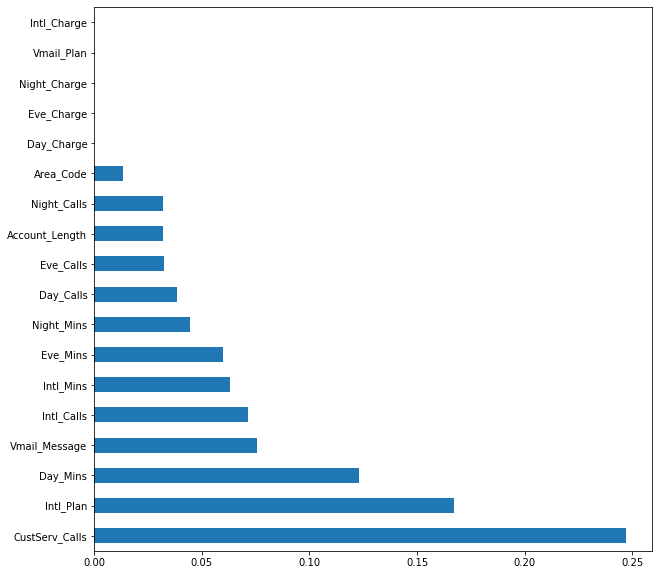

In [37]:
# Get Feature Importance from the classifier
feature_importance = xgboost.best_estimator_.feature_importances_
feat_importances = pd.Series(feature_importance, index=X.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

## Roc_curve 

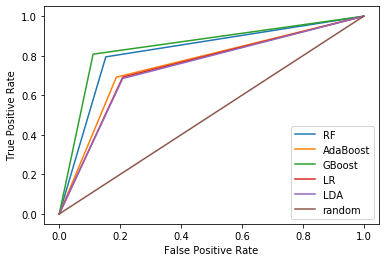

In [38]:
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_pred_rf)
fpr_AB, tpr_AB, thresholds_AB = metrics.roc_curve(y_test, y_pred_ab)
fpr_gboost, tpr_gboost, thresholds_gboost = metrics.roc_curve(y_test, y_pred_gboost)
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, y_pred_logreg)
fpr_LDA, tpr_LDA, thresholds_LDA = metrics.roc_curve(y_test, y_pred_lda)
plt.plot(fpr_RF, tpr_RF,'-',label = 'RF')
plt.plot(fpr_AB,tpr_AB,'-', label= 'AdaBoost')
plt.plot(fpr_gboost,tpr_gboost,'-', label= 'GBoost')
plt.plot(fpr_LR,tpr_LR,'-', label= 'LR')
plt.plot(fpr_LDA,tpr_LDA,'-', label= 'LDA')
plt.plot([0,1],[0,1],'-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Classification Report

In [39]:
print('\nRandom Forest Classifier:\n',metrics.classification_report(y_test, y_pred_rf, labels=[0,1]))
print('\nAdaBoost Classifier:\n',metrics.classification_report(y_test, y_pred_ab, labels=[0,1]))
print('\nLogistic Regression:\n',metrics.classification_report(y_test, y_pred_logreg, labels=[0,1]))
print('\nLinearDiscriminantAnalysis:\n',metrics.classification_report(y_test, y_pred_lda, labels=[0,1]))
print('\nGradient Boosting Classifier:\n',metrics.classification_report(y_test, y_pred_gboost, labels=[0,1]))
print('\nXGBoost Classifier:\n',metrics.classification_report(y_test, y_pred_xgboost, labels=[0,1]))


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       144
           1       0.84      0.79      0.82       146

    accuracy                           0.82       290
   macro avg       0.82      0.82      0.82       290
weighted avg       0.82      0.82      0.82       290


AdaBoost Classifier:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       144
           1       0.79      0.69      0.74       146

    accuracy                           0.75       290
   macro avg       0.76      0.75      0.75       290
weighted avg       0.76      0.75      0.75       290


Logistic Regression:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       144
           1       0.77      0.69      0.73       146

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290


### Gradient Boosting Classifier seems to be doing better job at identifying churn cases

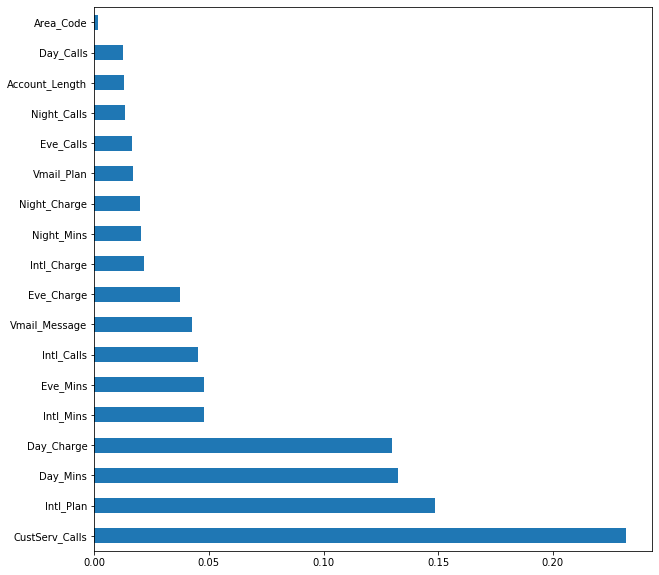

In [40]:
# Get Feature Importance from the classifier
feature_importance = gboost.best_estimator_.feature_importances_
feat_importances = pd.Series(feature_importance, index=X.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

## Conclusion
<hr>
Following steps were applied before creating final best model: 

1. Exploratory Data Analysis 
2. Data Cleaning 
3. Data Transformation 
4. Feature Selection 
5. Class balancing (using downsampling technique on majority class)
6. Hyper parameter tuning and 5-fold cross validation using GridSearchCV
6. Best Model Selection using High Precision and high recall of Churn class instead of focusing on accuracy metric.

<hr>

**Best Model Selection**:<br><hr>
This data is an example of highly imbalance classes. 

- 85% class-0 (Non churn customers) 
- 15% class-1 (churned customers)

Thus, accuracy is not the best measure to select the best model. Its important to choose model with high precision and recall for class-1 (churn customers). Gradient boosting model is giving very high importance to **CustServ_calls** and **Day_Charge** features. This model is doing best job at identifying customers who are about to Churn with high recall **81%** and precision **88%**. Comparing this with our second best performing model XGBoost classifier, we can say that it is not giving any importance to Day_Charge feature. 